In [34]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
   ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('order_items.csv', 'order_items'),
    ('geolocation.csv', 'geolocation'),
    #('payments.csv','payments'),
    ('order_reviews.csv', ' order_reviews')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='MySQL@8038',
    database='portfolio_projects'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/kpswe/Downloads/new folder'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc3 in position 2394: invalid continuation byte

In [40]:
import pandas as pd
import mysql.connector
import os
import chardet

# List of CSV files and their corresponding table names
csv_files = [
    ('payments.csv','payments'),
    ('order_reviews.csv', ' order_reviews')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='MySQL@8038',
    database='portfolio_projects'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/kpswe/Downloads/new folder'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Detect file encoding
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(10000))  # Read a portion of the file for encoding detection
        encoding = result['encoding']
    
    # Read the CSV file into a pandas DataFrame using the detected encoding
    df = pd.read_csv(file_path, encoding=encoding)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()


Processing payments.csv
NaN values before replacement:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Processing order_reviews.csv
NaN values before replacement:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87677
review_creation_date           0
review_answer_timestamp        0
dtype: int64



In [41]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import mysql.connector

mydb = mysql.connector.connect(
    host = "localhost",
    username = "root",
    password = "MySQL@8038",
    database = "portfolio_projects")

cur = mydb.cursor()


    

In [44]:
import matplotlib.pyplot as plt

 # List all unique cities where customers are located. 

In [46]:
query = """ select distinct (customer_city) from customers"""

cur.execute(query)

data = cur.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [48]:
query = """ select count(order_id) from orders where year(order_purchase_timestamp)= 2017"""

cur.execute(query)

data = cur.fetchall()

"total orders placed in 2017 are",data[0][0]

('total orders placed in 2017 are', 90202)

# Find the total sales per category.

In [51]:
query = """ select products.product_category category,round(sum(payments.payment_value),2)sales
from products join order_items
on products.product_id =order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

data

[('perfumery', 506738.66),
 ('Furniture Decoration', 1430176.39),
 ('telephony', 486882.05),
 ('bed table bath', 1712553.67),
 ('automotive', 852294.33),
 ('computer accessories', 1585330.45),
 ('housewares', 1094758.13),
 ('babies', 539845.66),
 ('toys', 619037.69),
 ('Furniture office', 646826.49),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.12),
 ('pet Shop', 311268.97),
 ('General Interest Books', 64694.76),
 ('stationary store', 317440.07),
 ('Watches present', 1429216.68),
 ('PCs', 279121.55),
 ('climatization', 91170.66),
 ('Construction Tools Construction', 241475.63),
 ('sport leisure', 1392127.56),
 ('Bags Accessories', 187151.29),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.29),
 ('Games consoles', 195480.38),
 ('Fashion Bags and Accessories', 218158.28),
 ('home appliances', 95532.27),
 ('Garden tools', 838280.75),
 ('Agro Industria e Comercio', 118730.61),
 (None, 252801.71),
 ('audio', 60324.62),
 ('technical books', 24915.44),
 ('Construction Tools 

# Calculate the percentage of orders that were paid in installments.

In [53]:
query = """ select
(select count(order_id) EMI_orders from payments where payment_installments>0)/
count(order_id)*100 from payments;
"""

cur.execute(query)

data = cur.fetchall()

"the percentage of orders that were paid in installments is ",data[0][0]

('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

# Count the number of customers from each state.

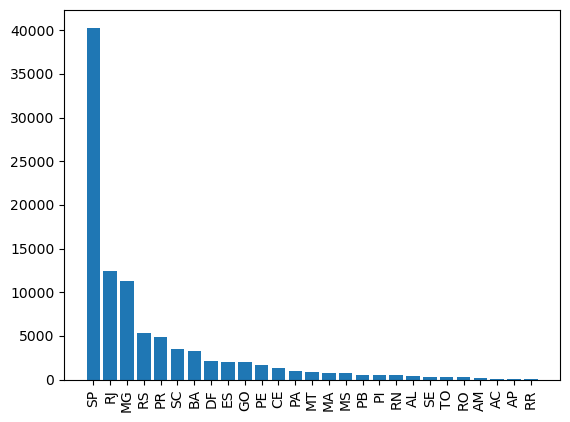

In [55]:
query = """ select count(distinct customer_unique_id) total_customers ,customer_state 
from customers group by customer_state;
"""

cur.execute(query)

data = cur.fetchall()

#"the number of customers from each state ",data
df = pd.DataFrame(data, columns = ["Total_Customers","State"])
df = df.sort_values(by = "Total_Customers", ascending = False)

plt.bar(df["State"], df["Total_Customers"])
plt.xticks(rotation = 90)
plt.show()

# Calculate the number of orders per month in 2018.

In [57]:
query = """ select count(distinct order_id), monthname(order_purchase_timestamp) from orders
where year(order_purchase_timestamp) = 2018
group by monthname(order_purchase_timestamp);
"""

cur.execute(query)

data = cur.fetchall()

"the number of orders per month in 2018 ",data

('the number of orders per month in 2018 ',
 [(6939, 'April'),
  (6512, 'August'),
  (6728, 'February'),
  (7269, 'January'),
  (6292, 'July'),
  (6167, 'June'),
  (7211, 'March'),
  (6873, 'May'),
  (4, 'October'),
  (16, 'September')])

# Find the average number of products per order, grouped by customer city.

In [59]:
query = """ with oc as(
select o.order_id,o.CUSTOMER_ID, count(oi.order_id) order_count from orders o inner Join order_items oi
on o.order_id=oi.order_id
group by o.order_id,o.CUSTOMER_ID)

select c.customer_city, avg(oc.order_count) avg_prd_per_orders
from customers c inner join oc on c.customer_id=oc.customer_id
group by c.customer_city;
"""

cur.execute(query)

data = cur.fetchall()

data

[('treze tilias', Decimal('2.5455')),
 ('indaial', Decimal('2.2308')),
 ('sao jose dos campos', Decimal('2.2770')),
 ('sao paulo', Decimal('2.3124')),
 ('porto alegre', Decimal('2.3499')),
 ('santos', Decimal('2.3229')),
 ('sao francisco do sul', Decimal('2.4706')),
 ('sao vicente', Decimal('2.1818')),
 ('joinville', Decimal('2.2053')),
 ('sao vendelino', Decimal('2.0000')),
 ('belo horizonte', Decimal('2.2865')),
 ('bage', Decimal('2.0952')),
 ('gravatai', Decimal('2.1250')),
 ('sumare', Decimal('2.2652')),
 ('rio de janeiro', Decimal('2.2935')),
 ('navegantes', Decimal('2.3226')),
 ('chapada do norte', Decimal('2.0000')),
 ('frederico westphalen', Decimal('2.1429')),
 ('contagem', Decimal('2.2884')),
 ('curitiba', Decimal('2.3192')),
 ('guaranta', Decimal('2.0000')),
 ('miracema', Decimal('2.1053')),
 ('campo grande', Decimal('2.2857')),
 ('rodeio', Decimal('2.2857')),
 ('barueri', Decimal('2.2331')),
 ('urussanga', Decimal('2.0000')),
 ('osorio', Decimal('2.3429')),
 ('duque de caxi

# Calculate the percentage of total revenue contributed by each product category.

In [95]:
query = """ select products.product_category category,round((sum(payments.payment_value)/ (select sum(payment_value) from payments))*100,2) revenue_prcnt
from products join order_items
on products.product_id =order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by revenue_prcnt desc
"""

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns = ["prod_category","Revenue%"])
df.head(10)




,prod_category,Revenue%
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


# Identify the correlation between product price and the number of times a product has been purchased.

In [123]:
query = """ select product_id, count(product_id), price from order_items
group by product_id, price
order by product_id,  count(product_id) desc ;
"""

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns = ["prod_category", "order_count", "price"])
df
import numpy as np
arr1 = df["order_count"]
arr2 = df["price"]

correlation_matrix = np.corrcoef(arr1, arr2)

# The correlation value is at position [0, 1] in the matrix
correlation_value = correlation_matrix[0, 1]
print(f"Correlation between order_count and price: {correlation_value}")


Correlation between order_count and price: -0.044218692770688225


# Calculate the total revenue generated by each seller, and rank them by revenue.

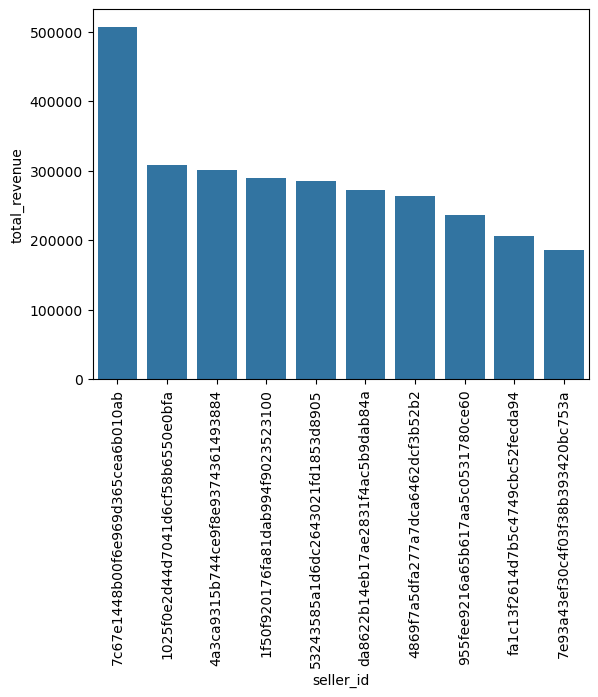

In [133]:
query = """ select seller_id, round(sum(payment_value),2) revenue, dense_rank() over(order by round(sum(payment_value),2) desc ) `rank`
from order_items oi
inner join payments p on oi.order_id = p.order_id
group by seller_id;;
"""

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns = ["seller_id", "total_revenue", "rank"])
df = df.head(10)
sb.barplot(x="seller_id", y = "total_revenue", data= df)
plt.xticks(rotation = 90)
plt.show()


# 1. Calculate the moving average of order values for each customer over their order history.

In [139]:
query = '''select customer_id, order_purchase_timestamp, payment_value,
avg(payment_value) over (partition by customer_id order by order_purchase_timestamp
rows between 2  preceding and current row) as mov_avg from (
select distinct o.customer_id, p.payment_value, o.order_purchase_timestamp
from payments p inner join orders o on 
p.order_id = o.order_id) a
order by customer_id; '''

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns = ["customer_id", "order_purchase_timestamp", "payment_value","mov_avg"])

df

,customer_id,order_purchase_timestamp,payment_value,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103266,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,0.64,27.120001
103267,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103268,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103269,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# 2. Calculate the cumulative sales per month for each year.

In [148]:
query = '''select `year`, `month`,PAYMENT,ROUND(sum(payment) over (order by `year`,`month`),2) CUM_SUM
from (
select year(order_purchase_timestamp) `year` , month (order_purchase_timestamp) `month`, 
SUM(p.payment_value) as payment
from orders o inner join payments p on o.order_id = p.order_id
group by `year`,`month`
order by `year`,`month`) a; '''

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data)

df

,0,1,2,3
0,2016,9,5.044800e+02,504.48
1,2016,10,1.181810e+05,118685.44
2,2016,12,3.924000e+01,118724.68
3,2017,1,2.769761e+05,395700.76
4,2017,2,5.838160e+05,979516.78
5,2017,3,8.997272e+05,1879243.98
6,2017,4,8.355761e+05,2714820.04
7,2017,5,1.185838e+06,3900657.68
8,2017,6,1.022553e+06,4923210.44
9,2017,7,1.184766e+06,6107976.28


# 3. Calculate the year-over-year growth rate of total sales.

In [154]:
query = ''' with a as(
select year(order_purchase_timestamp) `year`, 
ROUND(SUM(p.payment_value),2) as payment
from orders o inner join payments p on o.order_id = p.order_id
group by `year`
order by `year`)

select `year`, ((payment - lag(payment) over(order by year))/lag(payment) over(order by year))*100
from a
; '''

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns =["Years","sales"])

df

,Years,sales
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [158]:
query = ''' WITH first_purchase AS (
    SELECT customer_id, MIN(order_purchase_timestamp) AS first_purchase_date
    FROM orders
    GROUP BY customer_id
),
second_purchase AS (
    SELECT fp.customer_id, MIN(o.order_purchase_timestamp) AS second_purchase_date
    FROM first_purchase fp
    JOIN orders o ON fp.customer_id = o.customer_id
    WHERE o.order_purchase_timestamp > fp.first_purchase_date
      AND o.order_purchase_timestamp <= fp.first_purchase_date + INTERVAL 6 MONTH
    GROUP BY fp.customer_id
)

SELECT 
    COUNT(DISTINCT sp.customer_id) * 100.0 / COUNT(DISTINCT fp.customer_id) AS retention_rate
FROM first_purchase fp
LEFT JOIN second_purchase sp ON fp.customer_id = sp.customer_id; 
'''

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data)

df

,0
0,0.00000


# Identify the top 3 customers who spent the most money in each year.

<function matplotlib.pyplot.show(close=None, block=None)>

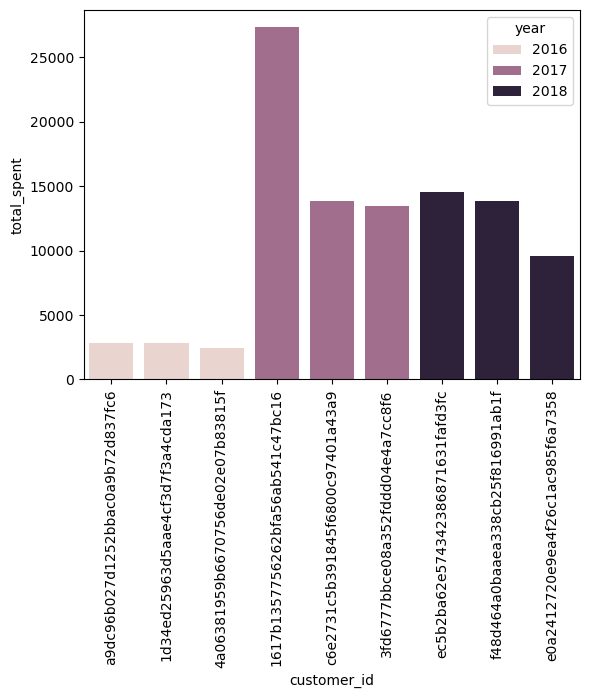

In [176]:
query = ''' select customer_id,`year`,total_spent,d_rank from (
select customer_id, total_spent, `year` ,dense_rank() over (partition by `year` order by total_spent desc) d_rank
from(
select customer_id, sum(payment_value) total_spent, year(order_purchase_timestamp) `year`
from orders o inner join payments p
on o.order_id = p.order_id
group by customer_id,`year`
order by `year`) as a) as b
where d_rank<=3
;
'''

cur.execute(query)

data = cur.fetchall()

data
df=pd.DataFrame(data, columns = ["customer_id","year","total_spent","d_rank"])
df
sb.barplot(x="customer_id", y = "total_spent",data=df, hue = "year")
plt.xticks(rotation = 90)
plt.show